<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/example-classifying-digits.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>

(classifying-digits)=
# Example: Classifying Digits

This is in the initial example discussed in the book "Deep Learning with Python" by François Chollet.

The MNIST dataset is a set of handwritten digits. It has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.


## Step 1: Load the data

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

`train_data` and `test_data`: lists of images of handwritten digits.

`train_labels` and `test_labels`: The label associated with an example is the digit 0-9.

In [3]:
digit_idx = 0
print(train_images[digit_idx])
print(train_labels[digit_idx])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

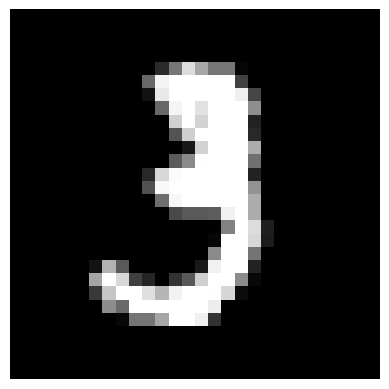

The label is 3


In [5]:
# display images
import matplotlib.pyplot as plt
import numpy as np

def display_image(image):
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.axis('off')
    plt.show()

digit_idx = 10
display_image(train_images[digit_idx])
print(f"The label is {train_labels[digit_idx]}")

## Step 2: Preprocess the data

We reshape the data into the shape that the network expects, and scale it so that all values are in the `[0, 1]` interval.

* Reshaping flattens images so they can be inputted to standard neural networks.
* Normalizing converts pixel values from `[0,255]` to `[0,1]` to aid neural network training.
* Converting to `float32` ensures the model works with precise fractional numbers.



In [10]:

train_images = train_images.reshape((60000, 28*28)) 
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [11]:

print(len(train_images[0]))

784


## Define the Model

`sparse_categorical_crossentropy` is a loss function used for multi-class classification problems when the labels are *integers* rather than *one-hot vectors*.

It's essentially identical to `categorical_crossentropy`, except it simplifies label handling by not requiring explicit one-hot encoding.


In [22]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(64, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='rmsprop', 
    loss = 'sparse_categorical_crossentropy', 
    metrics=["accuracy"])


## Step 4: Train the model


We will train the model for 20 epochs in mini-batches of 512 samples.

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, verbose=0)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.8397 - loss: 0.5793
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.9538 - loss: 0.1545
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9671 - loss: 0.1086
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9753 - loss: 0.0807
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9795 - loss: 0.0636
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step - accuracy: 0.9834 - loss: 0.0526
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 916us/step - accuracy: 0.9857 - loss: 0.0445
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.9880 - loss: 0.0374
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - accuracy: 0.9896 - loss: 0.0329
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9913 - loss: 0.0268


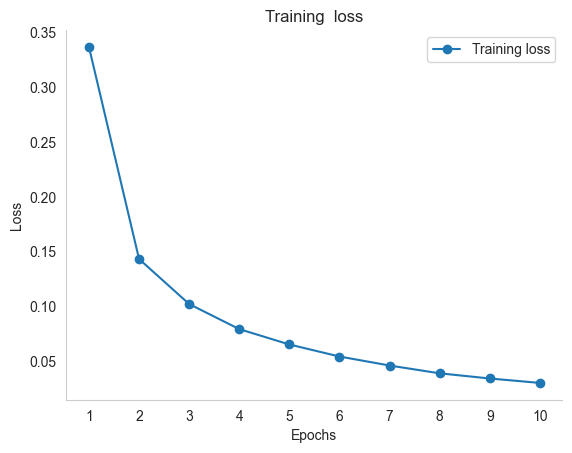

In [24]:
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
history_dict = history.history

loss_values = history_dict["loss"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, "o-", label="Training loss") 
plt.title("Training  loss") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Loss") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

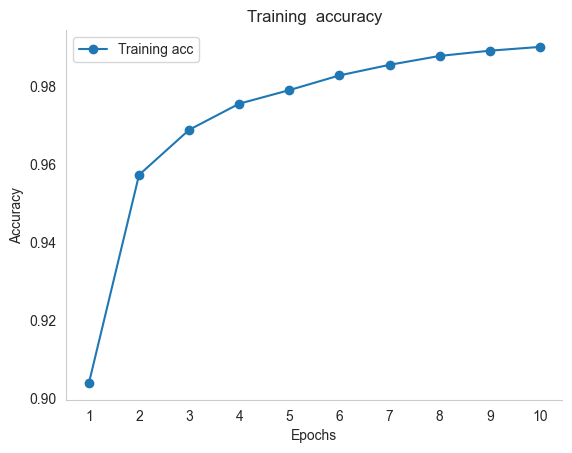

In [25]:
acc = history_dict["accuracy"]

epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, acc, "o-", label="Training acc")
plt.title("Training  accuracy") 
plt.xticks(epochs)
plt.xlabel("Epochs") 
plt.ylabel("Accuracy") 
plt.legend() 
sns.despine()
plt.grid(False)
plt.show()

In [26]:
results = model.evaluate(test_images, test_labels)

print(f"The test loss is {results[0]}")
print(f"The test accuracy is {results[1]}")
print("The predictions are:")   
predictions = model.predict(test_images)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9731 - loss: 0.0985
The test loss is 0.08282630890607834
The test accuracy is 0.9763000011444092
The predictions are:
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step
[[9.87493681e-12 7.84769139e-09 1.14026044e-07 ... 9.99997497e-01
  1.73625381e-07 1.52393579e-06]
 [7.79907484e-14 6.42986242e-06 9.99992371e-01 ... 4.96238657e-15
  6.73853776e-07 2.52265147e-18]
 [1.70551910e-08 9.99878883e-01 2.28347130e-06 ... 2.91024062e-05
  5.01239592e-05 1.69830699e-07]
 ...
 [5.59415851e-20 1.27931069e-10 5.52213679e-19 ... 2.47705485e-11
  1.58642048e-13 6.60931709e-09]
 [8.73641030e-14 9.59674459e-16 3.59107903e-16 ... 1.31544680e-16
  6.01234206e-07 2.11670688e-16]
 [8.93554572e-14 9.99309222e-17 1.94375901e-14 ... 3.23735563e-19
  2.88672860e-14 1.43133118e-14]]
